In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.speedup import calculate_speedups
sns.set_theme()

## Read data

In [2]:
threads = 32

branches = ['split-counters-sleepers-only-cache-padded']
# no-ff-not-bound, ff-not-bound, ff-bound
exp = 'ff-bound' 

# no-ff-not-bound -> done
# ff-not-bound -> done
# ff-bound -> done
# no-ff-bound -> 

our_df = None
master_df = None

for i in range(1, threads + 1):
    for branch in branches:
        filename = '20-07-2022/{}/speedup-{}-{}-threads.csv'.format(exp, branch, i)
        new_df = pd.read_csv(filename)
        new_df['threads'] = i
        new_df['branch'] = branch
        our_df = pd.concat([our_df, new_df], ignore_index = True)
        
    filename = '20-07-2022/{}/speedup-master-{}-threads.csv'.format(exp, i)
    new_master_df = pd.read_csv(filename)
    new_master_df['threads'] = i
    new_master_df['branch'] = 'master'
    master_df = pd.concat([master_df, new_master_df], ignore_index = True)

## Calculate speedups and prepare to plot

In [3]:
df = pd.concat([our_df, master_df], ignore_index = True)
speedups = calculate_speedups(df)
df = pd.DataFrame(data=speedups)

## Plot fixed frequency speedups

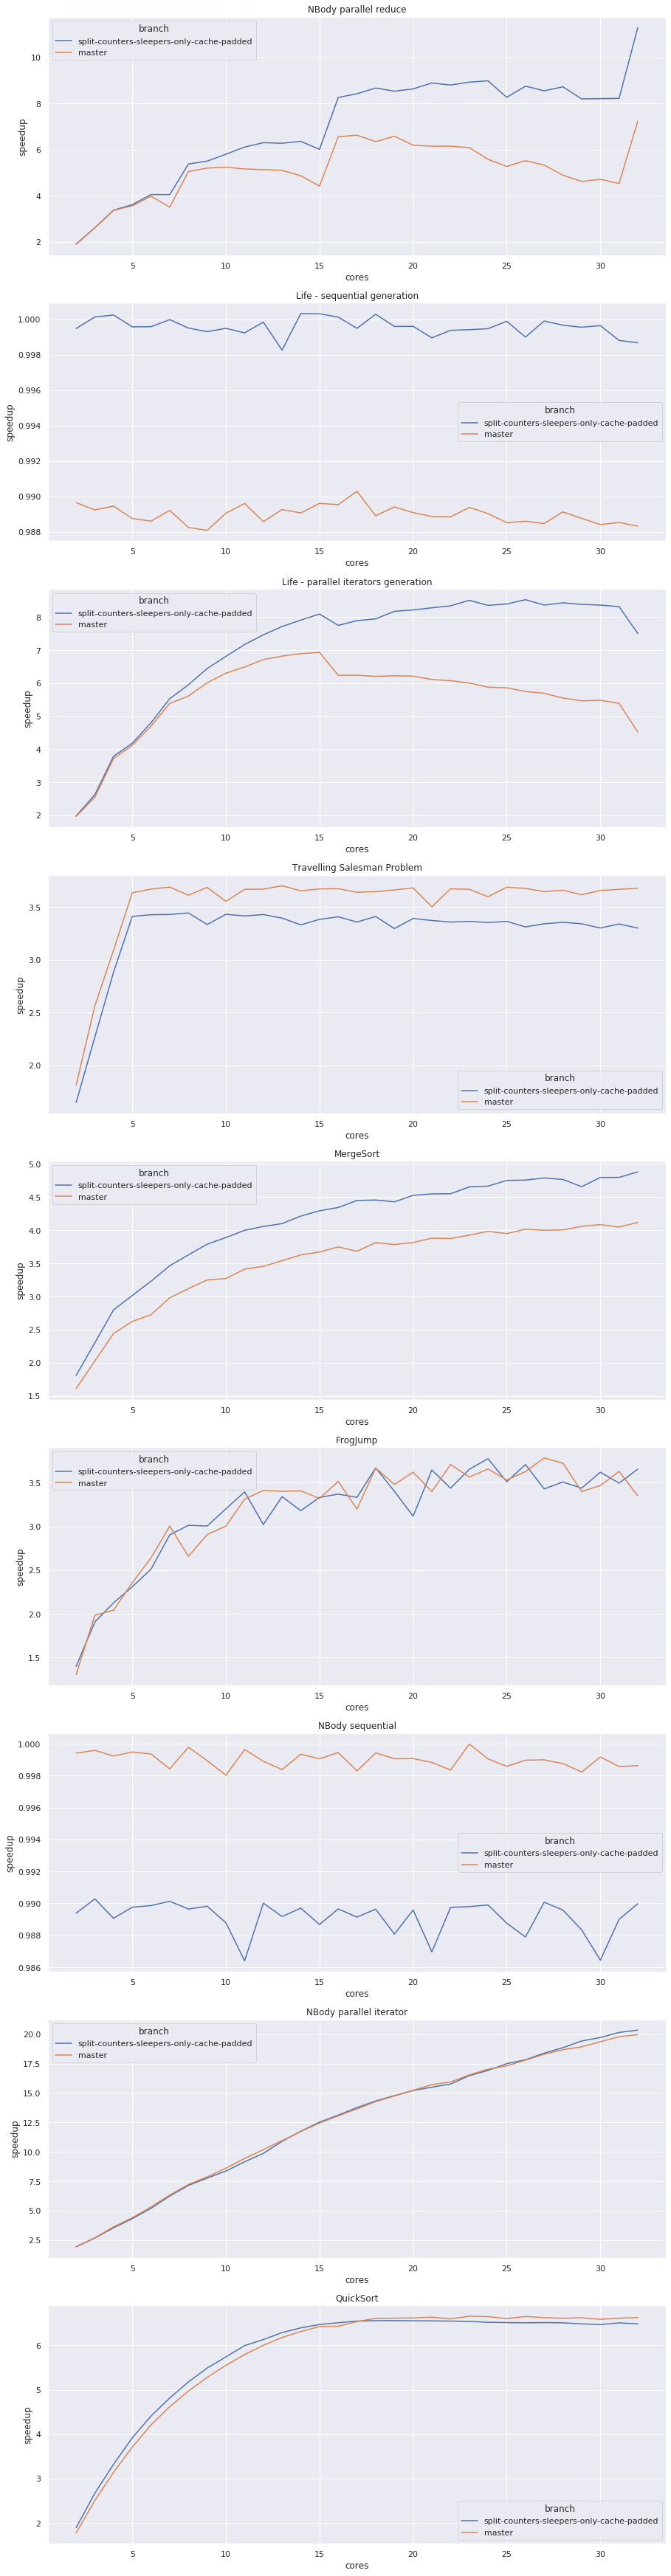

In [4]:
algorithms = set(df['name'])

fig, axs = plt.subplots(len(algorithms), figsize=(15, len(algorithms) * 7))

for i, algorithm in enumerate(algorithms):
    algorithm_df = df[df['name'] == algorithm]
    
    sns.lineplot(x='cores', y='speedup', hue='branch', data=algorithm_df, ax=axs[i]);
    axs[i].set_title(algorithm);    

## Branches

### master

Master branch of rayon without changes.

### split-counters-sleepers-only-cache-padded

Still uses the Job Events Counter mechanism, but don't load the inactive threads counter to decide how many threads to wake up when a new job is posted. There are a lot of writes to this counter, which should cause cache missses.

## Conclusion
